## Exercise 3.3b

## Part I

Recall that the Van der Pol equation is given by 
$$y_1' = y2$$

$$y_2' = μ * (1 - y^2) * y_2 - y_1$$

In [1]:
# Import the required packages a
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import platform
import warnings
from math import sqrt
warnings.filterwarnings("ignore")

In [2]:
def visualize(t, state):
    # visualize the result as a function of time
    plt.plot(t, state[:,0])
    plt.xlabel('t')
    plt.ylabel('x(t)')
    plt.title('A plot of function against time')
    plt.show()

    # visualize the result as a phase portrait
    plt.plot(state[:,0], state[:,1])
    plt.xlabel('x(t)')
    plt.ylabel('y(t)')
    plt.title('A plot of function against time using phase portrait')
    plt.show()

In [3]:
# define the Van der Pol equation
def van_der_pol(state, t, mu):
    x, y = state
    dxdt = y
    dydt = mu * (1 - x**2) * y - x
    return dxdt, dydt

In [4]:
def two_stage_gauss(f, state, t, dt, args):
    # define the matrix A and vector b
    A = np.array([[1/4, 1/4-np.sqrt(3)/6], [1/4+np.sqrt(3)/6, 1/4]])
    b = np.array([1/2, 1/2])
    # compute the intermediate state
    k1 = f(state, t, *args)
    k2 = f(state+dt*A[0,0]*k1, t+dt*A[0,1], *args)
    k3 = f(state+dt*A[1,0]*k1+dt*A[1,1]*k2, t+dt, *args)
    # compute the next state
    next_state = state + dt * b[0] * k1 + dt * b[1] * k2
    return next_state

In [5]:
def main():
    x0 = 2
    y0 = 0
    mu = 2
    dt = 0.01
    t = np.arange(0, 10, dt)

    # solve the ODE using the two-stage Gauss method
    state = odeint(van_der_pol, (x0, y0), t, rtol=1e-12, atol=1e-12, h0=dt, args=(mu,))
    return t, state
    print('Python version: %s' % (platform.python_version()))

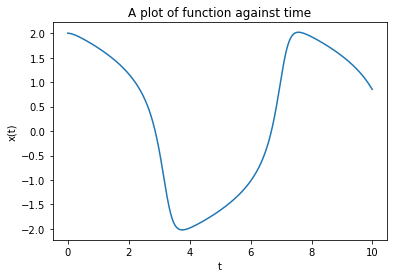

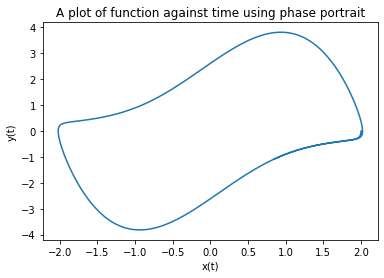

In [6]:
# Program driver
if __name__ == "__main__":
    t, state = main()
    visualize(t, state)

## Part II

### Solve for μ E {0.5, 5, 15, 100, 1000}

In [7]:
def visualize(t, y, mu):
    # Create line plot of y1 vs t
    plt.plot(t, y)
    # Label axes and show plot
    plt.xlabel('time')
    plt.ylabel('y1')
    plt.title('A plot of the function against time')
    plt.show()

In [8]:
# Define the corresponding ODE 
def vanderPol(y, t, mu):
    dy = np.zeros_like(y)
    dy[0] = y[1]
    dy[1] = mu * (1 - y[0]**2) * y[1] - y[0]
    return dy

In [9]:
def main(y0, t, dt, mu):
    sol = []
    # Set initial condition
    y = y0

    # Loop over time steps
    for i in range(len(t)):
        # Calculate derivative at current time step
        dy1 = vanderPol(y, t[i], mu)

        # Estimate derivative at next time step
        dy2 = vanderPol(y + dt * dy1, t[i] + dt, mu)

        # Calculate state at next time step using derivatives
        y_next = y + dt/2 * (dy1 + dy2)

        # Update current state
        y = y_next

        # Append current state to solution array
        sol.append(y)
    
    return sol

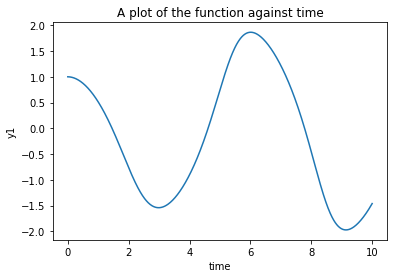

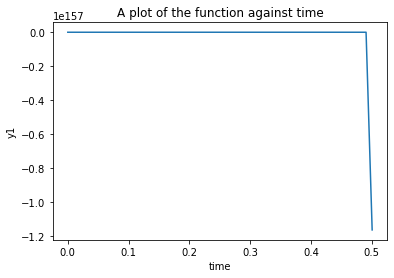

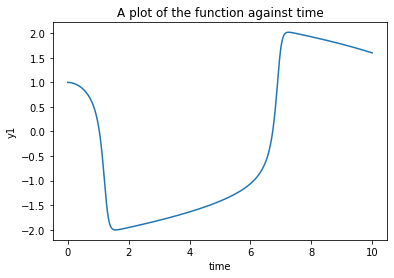

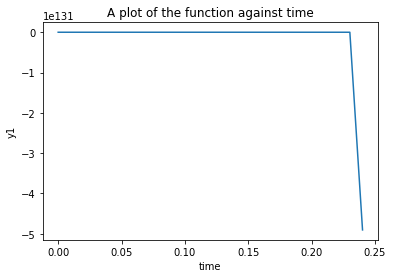

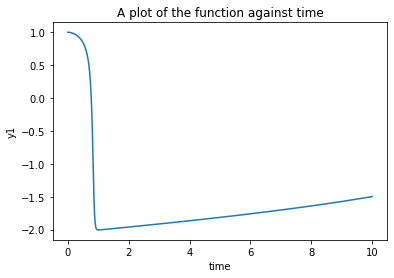

In [10]:
# Program driver
if __name__ == "__main__":
    y0 = [1, 0]
    t = np.linspace(0, 10, 1000)
    dt = 0.01
    mu_s = {0.5, 5, 15, 100, 1000}
    for mu in mu_s:
        sol = main(y0, t, dt, mu)
        y1 = [y[0] for y in sol]
        visualize(t, y1, mu)